# Netfilx Prize

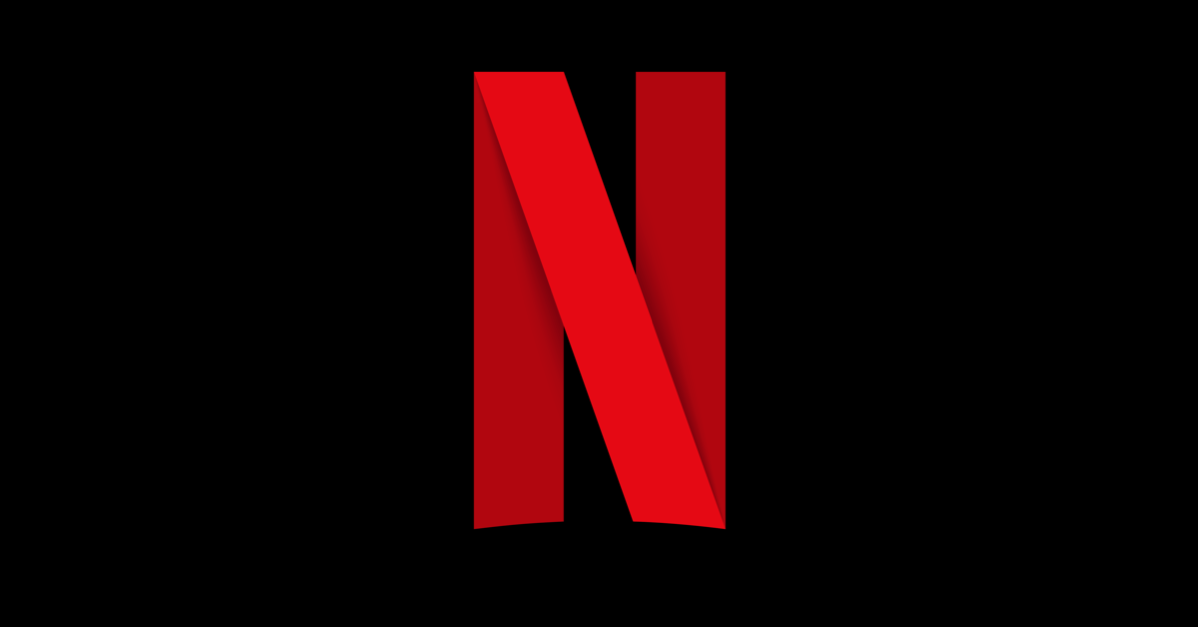

<h1>1. Business Problem </h1>

<h2> 1.1 Problem Description </h2>

<p>
Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: CinematchSM. Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes. And while <b>Cinematch</b> is doing pretty well, it can always be made better.
</p>
<p>Now there are a lot of interesting alternative approaches to how Cinematch works that netflix haven’t tried. Some are described in the literature, some aren’t. We’re curious whether any of these can beat Cinematch by making better predictions. Because, frankly, if there is a much better approach it could make a big difference to our customers and our business.</p>
<p> Credits: https://www.netflixprize.com/rules.html </p>

<h2> 1.2 Problem Statement </h2>

<p>
Netflix provided a lot of anonymous rating data, and a prediction accuracy bar that is 10% better than what Cinematch can do on the same training data set. (Accuracy is a measurement of how closely predicted ratings of movies match subsequent actual ratings.) 
</p>

<h2> 1.3 Sources </h2>

<ul>
<li> https://www.netflixprize.com/rules.html</li>
<li> https://www.kaggle.com/netflix-inc/netflix-prize-data</li>
<li> Netflix blog: https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429 (very nice blog)</li>
<li>surprise library: http://surpriselib.com/ (we use many models from this library)</li>
<li>surprise library doc: http://surprise.readthedocs.io/en/stable/getting_started.html (we use many models from this library)</li>
<li>installing surprise: https://github.com/NicolasHug/Surprise#installation </li>
<li> Research paper: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf (most of our work was inspired by this paper)</li>
<li> SVD Decomposition : https://www.youtube.com/watch?v=P5mlg91as1c </li>
<li> https://github.com/SRIRAM777/Netflix-Movie-Recommendation-System/blob/master/Netflix_Movie_Recommender_System_Sriram2.ipynb</li>
    
</ul>

<h2>1.4 Real world/Business Objectives and constraints  </h2>

Objectives:
1. Predict the rating that a user would give to a movie that he ahs not yet rated.
2. Minimize the difference between predicted and actual rating (RMSE and MAPE)
<br>

Constraints:
1. Some form of interpretability.

<h1> 2. Machine Learning Problem </h1>

<h2>2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> Get the data from : https://www.kaggle.com/netflix-inc/netflix-prize-data/data </p>
<p> Data files : 
<ul> 
<li> combined_data_1.txt </li>
<li> combined_data_2.txt </li>
<li> combined_data_3.txt </li>
<li> combined_data_4.txt </li>
<li> movie_titles.csv </li>
</ul>
<pre>  
The first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:

CustomerID,Rating,Date

MovieIDs range from 1 to 17770 sequentially.
CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
Ratings are on a five star (integral) scale from 1 to 5.
Dates have the format YYYY-MM-DD.
</pre>

<h3> 2.1.2 Example Data point </h3>

<pre>
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26
823519,3,2004-05-03
893988,3,2005-11-17
124105,4,2004-08-05
1248029,3,2004-04-22
1842128,4,2004-05-09
2238063,3,2005-05-11
1503895,4,2005-05-19
2207774,5,2005-06-06
2590061,3,2004-08-12
2442,3,2004-04-14
543865,4,2004-05-28
1209119,4,2004-03-23
804919,4,2004-06-10
1086807,3,2004-12-28
1711859,4,2005-05-08
372233,5,2005-11-23
1080361,3,2005-03-28
1245640,3,2005-12-19
558634,4,2004-12-14
2165002,4,2004-04-06
1181550,3,2004-02-01
1227322,4,2004-02-06
427928,4,2004-02-26
814701,5,2005-09-29
808731,4,2005-10-31
662870,5,2005-08-24
337541,5,2005-03-23
786312,3,2004-11-16
1133214,4,2004-03-07
1537427,4,2004-03-29
1209954,5,2005-05-09
2381599,3,2005-09-12
525356,2,2004-07-11
1910569,4,2004-04-12
2263586,4,2004-08-20
2421815,2,2004-02-26
1009622,1,2005-01-19
1481961,2,2005-05-24
401047,4,2005-06-03
2179073,3,2004-08-29
1434636,3,2004-05-01
93986,5,2005-10-06
1308744,5,2005-10-29
2647871,4,2005-12-30
1905581,5,2005-08-16
2508819,3,2004-05-18
1578279,1,2005-05-19
1159695,4,2005-02-15
2588432,3,2005-03-31
2423091,3,2005-09-12
470232,4,2004-04-08
2148699,2,2004-06-05
1342007,3,2004-07-16
466135,4,2004-07-13
2472440,3,2005-08-13
1283744,3,2004-04-17
1927580,4,2004-11-08
716874,5,2005-05-06
4326,4,2005-10-29
</pre>

<h2>2.2 Mapping the real world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<pre>
For a given movie and user we need to predict the rating would be given by him/her to the movie. 
The given problem is a Recommendation problem 
It can also seen as a Regression problem 
</pre>

<h3> 2.2.2 Performance metric </h3>

<ul>
<li> Mean Absolute Percentage Error: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error </li>
<li> Root Mean Square Error: https://en.wikipedia.org/wiki/Root-mean-square_deviation </li>
</ul>


<h3> 2.2.3 Machine Learning Objective and Constraints </h3>

1. Minimize RMSE.
2. Try to provide some interpretability.

In [4]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
# globalstart = datetime.now()
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV
from tqdm import tqdm

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Preprocessing</h2> 

<h3>3.1.1 Converting / Merging whole data to required format: u_i, m_j, r_ij</h3>

In [5]:
start = datetime.now()
if not os.path.isfile('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/data.csv'):
    # Create a file 'data.csv' before reading it
    # Read all the files in netflix and store them in one big file('data.csv')
    # We re reading from each of the four files and appendig each rating to a global file 'train.csv'
    data = open('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/data.csv', mode='w')
    
    row = list()
    files=['E:/BOOKS NEW/Cases datasets/4. Netflix Prize/combined_data_1.txt','E:/BOOKS NEW/Cases datasets/4. Netflix Prize/combined_data_2.txt', 
           'E:/BOOKS NEW/Cases datasets/4. Netflix Prize/combined_data_3.txt','E:/BOOKS NEW/Cases datasets/4. Netflix Prize/combined_data_4.txt']
    for file in tqdm(files):
        print("Reading ratings from {}...".format(file))
        with open(file) as f:
            for line in f: 
                del row[:] # you don't have to do this.
                line = line.strip()
                if line.endswith(':'):
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
        print("Done.\n")
    data.close()
print('Time taken :', datetime.now() - start)

Time taken : 0:00:00.000998


In [6]:
print("creating the dataframe from data.csv file..")
df = pd.read_csv('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
print('Done.\n')

# we are arranging the ratings according to time.
print('Sorting the dataframe by date..')
df.sort_values(by='date', inplace=True)
print('Done..')

creating the dataframe from data.csv file..
Done.

Sorting the dataframe by date..
Done..


In [7]:
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


In [8]:
df.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<h3>3.1.2 Checking for NaN values </h3>

In [9]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


<h3>3.1.3 Removing Duplicates </h3>

In [10]:
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


<h3>3.1.4 Basic Statistics (#Ratings, #Users, and #Movies)</h3>

In [11]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user)))
print("Total No of movies  :", len(np.unique(df.movie)))

Total data 
--------------------------------------------------

Total no of ratings : 100480507
Total No of Users   : 480189
Total No of movies  : 17770


<h2>3.2 Spliting data into Train and Test(80:20) </h2>

In [12]:
if not os.path.isfile('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/train.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[:int(df.shape[0]*0.80)].to_csv("E:/BOOKS NEW/Cases datasets/4. Netflix Prize/train.csv", index=False)

if not os.path.isfile('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/test.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[int(df.shape[0]*0.80):].to_csv("E:/BOOKS NEW/Cases datasets/4. Netflix Prize/test.csv", index=False)

train_df = pd.read_csv("E:/BOOKS NEW/Cases datasets/4. Netflix Prize/train.csv", parse_dates=['date'])
test_df = pd.read_csv("E:/BOOKS NEW/Cases datasets/4. Netflix Prize/test.csv")

<h3>3.2.1 Basic Statistics in Train data (#Ratings, #Users, and #Movies)</h3>

In [13]:
# movies = train_df.movie.value_counts()
# users = train_df.user.value_counts()
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user)))
print("Total No of movies  :", len(np.unique(train_df.movie)))

Training data 
--------------------------------------------------

Total no of ratings : 80384405
Total No of Users   : 405041
Total No of movies  : 17424


<h3>3.2.2 Basic Statistics in Test data (#Ratings, #Users, and #Movies)</h3>

In [14]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user)))
print("Total No of movies  :", len(np.unique(test_df.movie)))

Test data 
--------------------------------------------------

Total no of ratings : 20096102
Total No of Users   : 349312
Total No of movies  : 17757


 <h2> 3.3 Exploratory Data Analysis on Train data </h2>

In [15]:
# method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

<h3> 3.3.1 Distribution of ratings </h3>

<IPython.core.display.Javascript object>


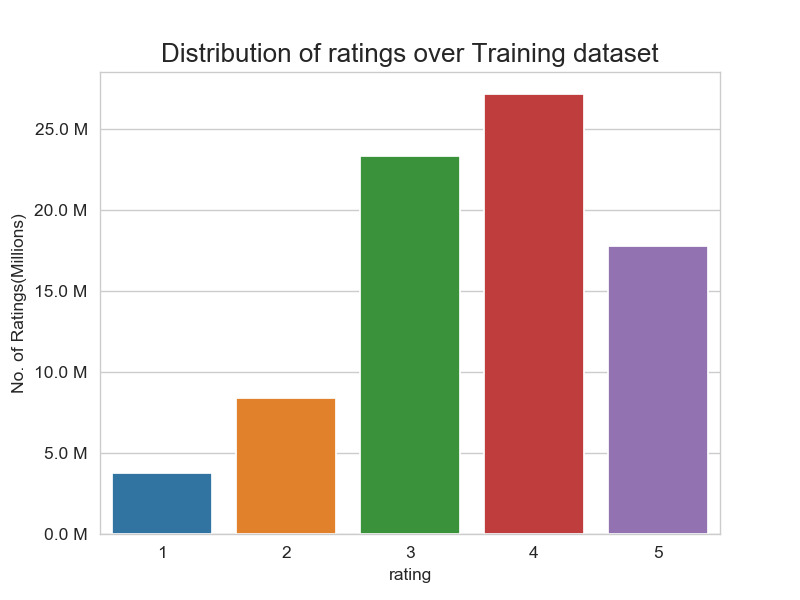

In [16]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(train_df.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

<p style="font-size:13px"> <b>Add new column (week day) to the data set  for analysis.</b></p>

In [17]:
# It is used to skip the warning ''SettingWithCopyWarning''.. 
pd.options.mode.chained_assignment = None  # default='warn'

train_df['day_of_week'] = train_df.date.dt.day_name()

train_df.tail()

,movie,user,rating,date,day_of_week
80384400,12074,2033618,4,2005-08-08,Monday
80384401,862,1797061,3,2005-08-08,Monday
80384402,10986,1498715,5,2005-08-08,Monday
80384403,14861,500016,4,2005-08-08,Monday
80384404,5926,1044015,5,2005-08-08,Monday


<h3> 3.3.2 Number of Ratings per a month </h3>

<IPython.core.display.Javascript object>


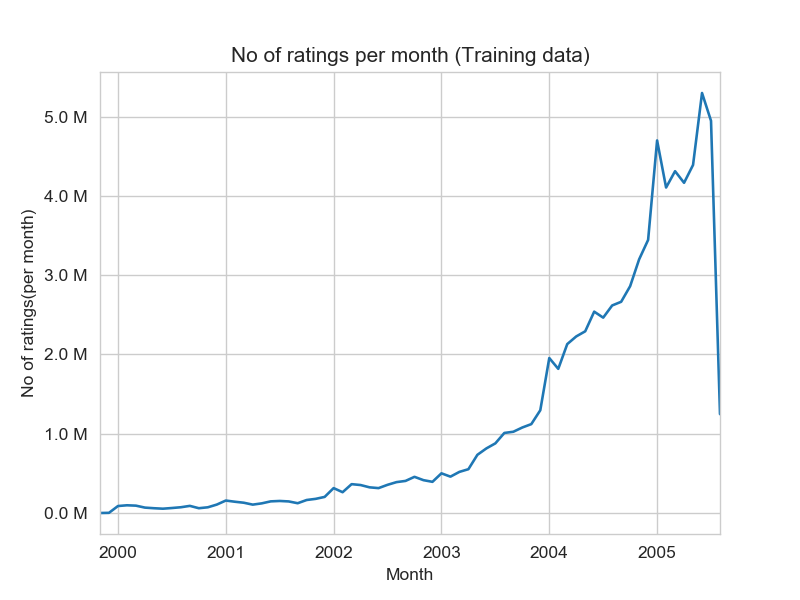

In [18]:
ax = train_df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<h3> 3.3.3 Analysis on the Ratings given by user </h3>

In [19]:
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64

<IPython.core.display.Javascript object>


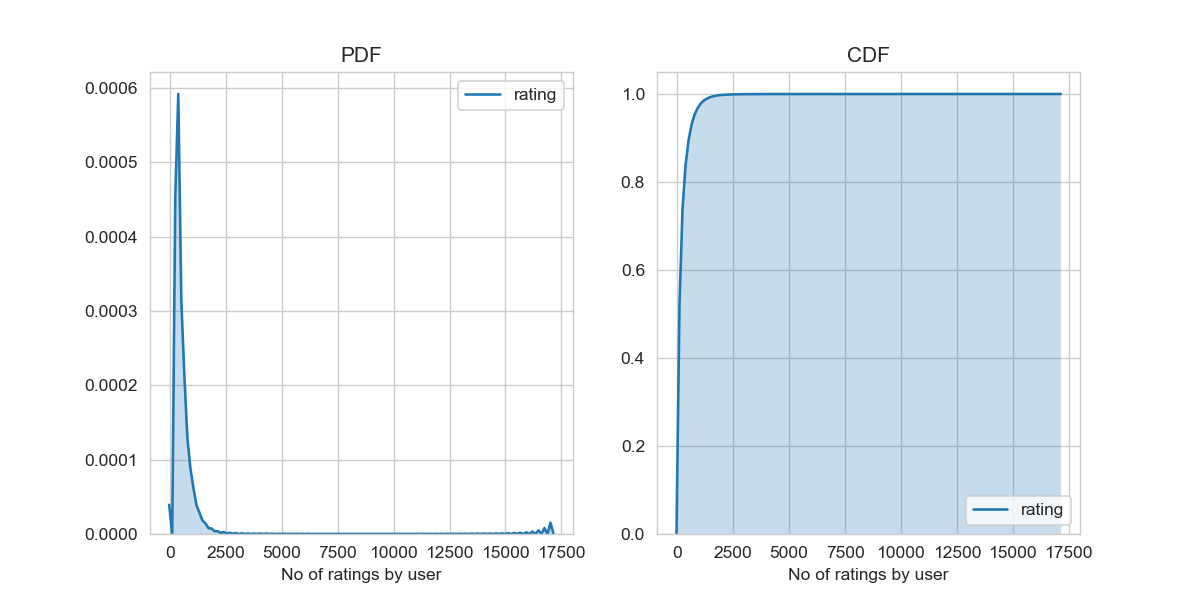

In [20]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [21]:
no_of_rated_movies_per_user.describe()

count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

> _There,  is something interesting going on with the quantiles.._

In [22]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<IPython.core.display.Javascript object>


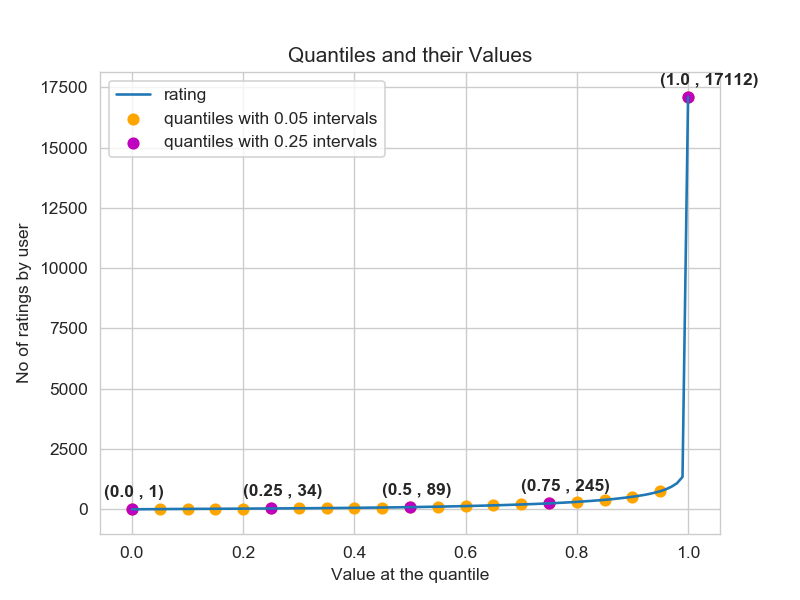

In [23]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

In [24]:
quantiles[::5]

0.00        1
0.05        7
0.10       15
0.15       21
0.20       27
0.25       34
0.30       41
0.35       50
0.40       60
0.45       73
0.50       89
0.55      109
0.60      133
0.65      163
0.70      199
0.75      245
0.80      307
0.85      392
0.90      520
0.95      749
1.00    17112
Name: rating, dtype: int64

__how many ratings at the last 5% of all ratings__??

In [25]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 749)) )


 No of ratings at last 5 percentile : 20305



<h3> 3.3.4 Analysis of ratings of a movie given by a user </h3>

<IPython.core.display.Javascript object>


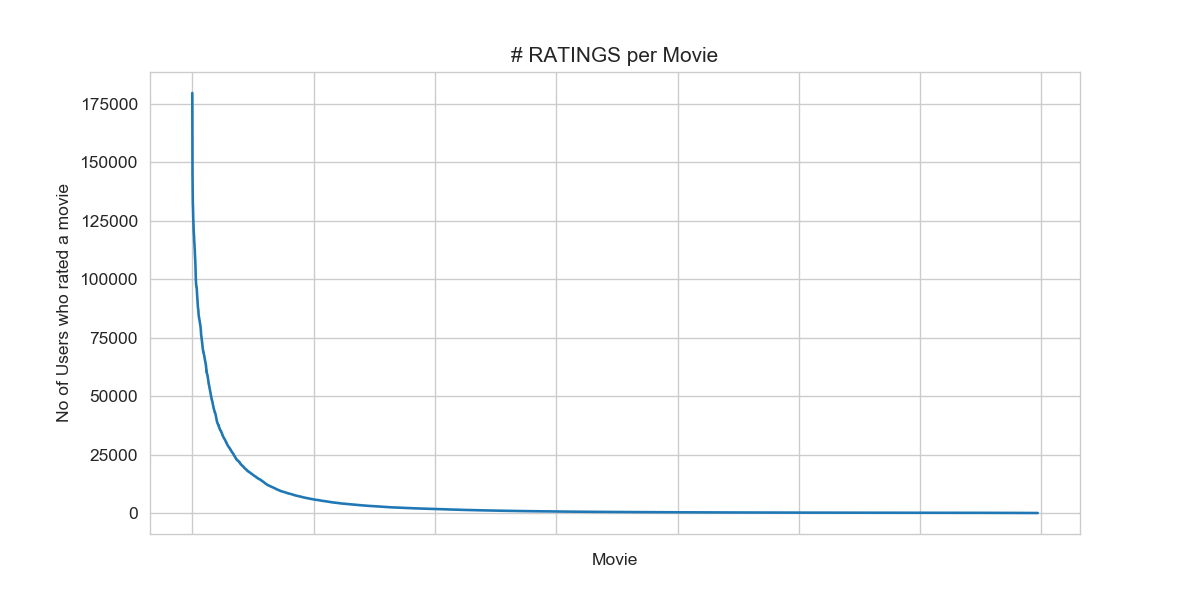

In [26]:
no_of_ratings_per_movie = train_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

- __It is very skewed.. just like nunmber of ratings given per user.__
    
    
    - There are some movies (which are very popular) which are rated by huge number of users.
    
    - But most of the movies(like 90%) got some hundereds of ratings.

<h3> 3.3.5 Number of ratings on each day of the week</h3>

<IPython.core.display.Javascript object>


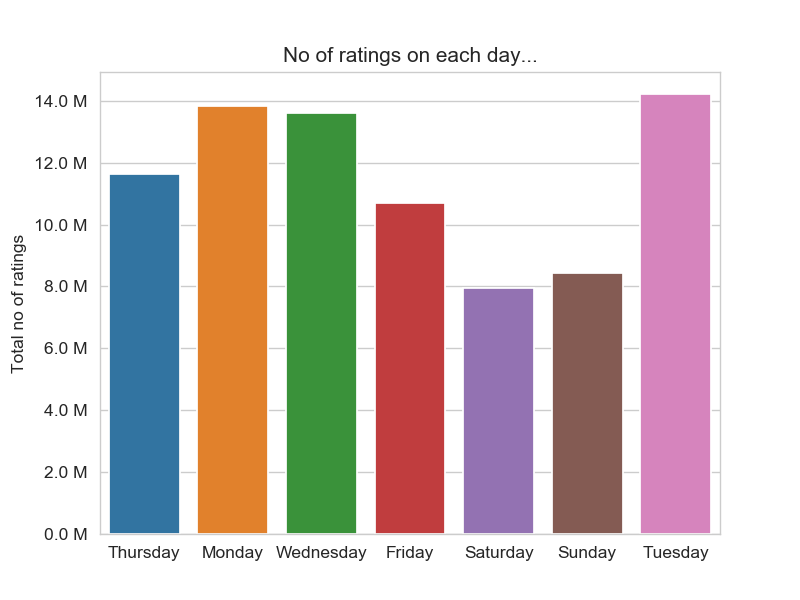

In [27]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<IPython.core.display.Javascript object>


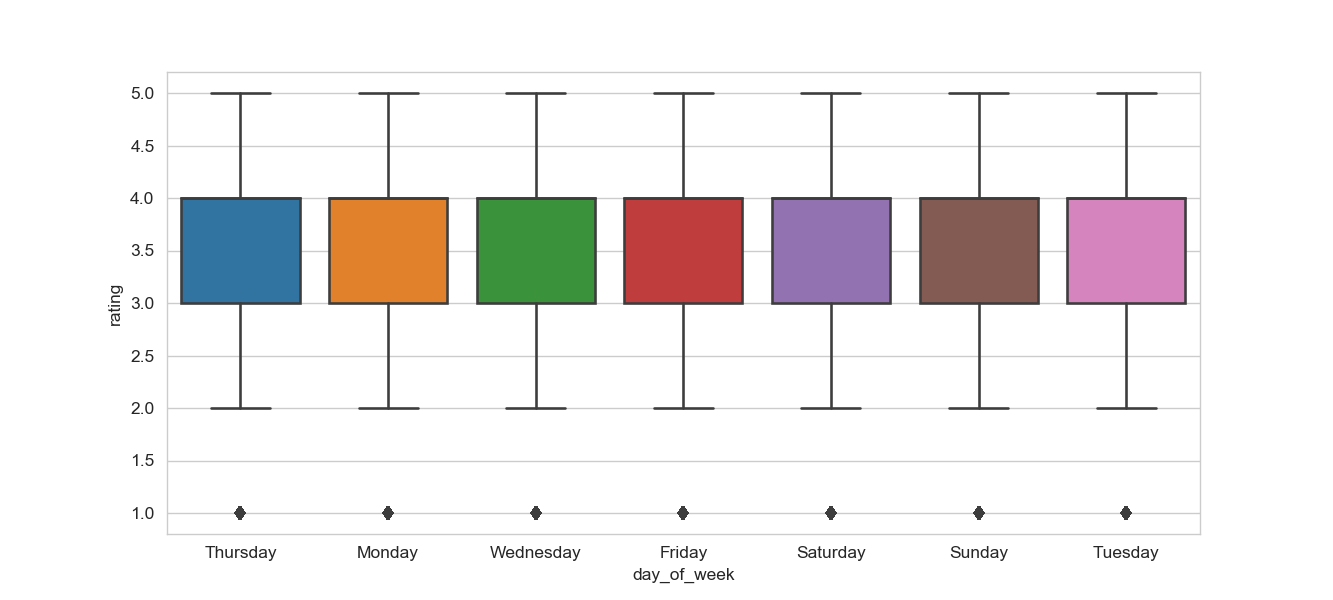

0:00:13.058641


In [28]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=train_df)
plt.show()
print(datetime.now() - start)

In [29]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
print(" AVerage ratings")
print("-"*30)
print(avg_week_df)
print("\n")

 AVerage ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64




<h3> 3.3.6 Creating sparse matrix from data frame </h3>

<table>
<tr>
<td>
<img src='images/data_c.jpg' width='250px' align=left/>
</td>
<td>
<img src='images/arrow.jpg' width='60px' align=left/>
</td>
<td>
<img src='images/data_sparse_c.jpg' width='400px' align=left/>
</td>
</tr>
</table>

<h4> 3.3.6.1 Creating sparse matrix from train data frame </h4>

In [30]:
start = datetime.now()
if os.path.isfile('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user.values,
                                               train_df.movie.values)),)
    
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("E:/BOOKS NEW/Cases datasets/4. Netflix Prize/train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:03.159239


<p><b>The Sparsity of Train Sparse Matrix</b></p>

In [31]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Train matrix : 99.8292709259195 % 


<h4> 3.3.6.2 Creating sparse matrix from test data frame </h4>

In [32]:
start = datetime.now()
if os.path.isfile('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user.values,
                                               test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("E:/BOOKS NEW/Cases datasets/4. Netflix Prize/test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:01.070142


<p><b>The Sparsity of Test data Matrix</b></p>

In [33]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.95731772988694 % 


<h3>3.3.7 Finding Global average of all movie ratings, Average rating per user, and Average rating per movie</h3>

In [34]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)

def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_movie ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

<h4> 3.3.7.1 finding global average of all movie ratings </h4>

In [35]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.582890686321557}

<h4> 3.3.7.2 finding average rating per user</h4>

In [36]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_averages['user'][10])


Average rating of user 10 : 3.3781094527363185


<h4> 3.3.7.3 finding average rating per movie</h4>

In [37]:
train_averages['movie'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15 :',train_averages['movie'][15])


 AVerage rating of movie 15 : 3.3038461538461537


<h4> 3.3.7.4 PDF's & CDF's of Avg.Ratings of Users & Movies (In Train Data)</h4>

<IPython.core.display.Javascript object>


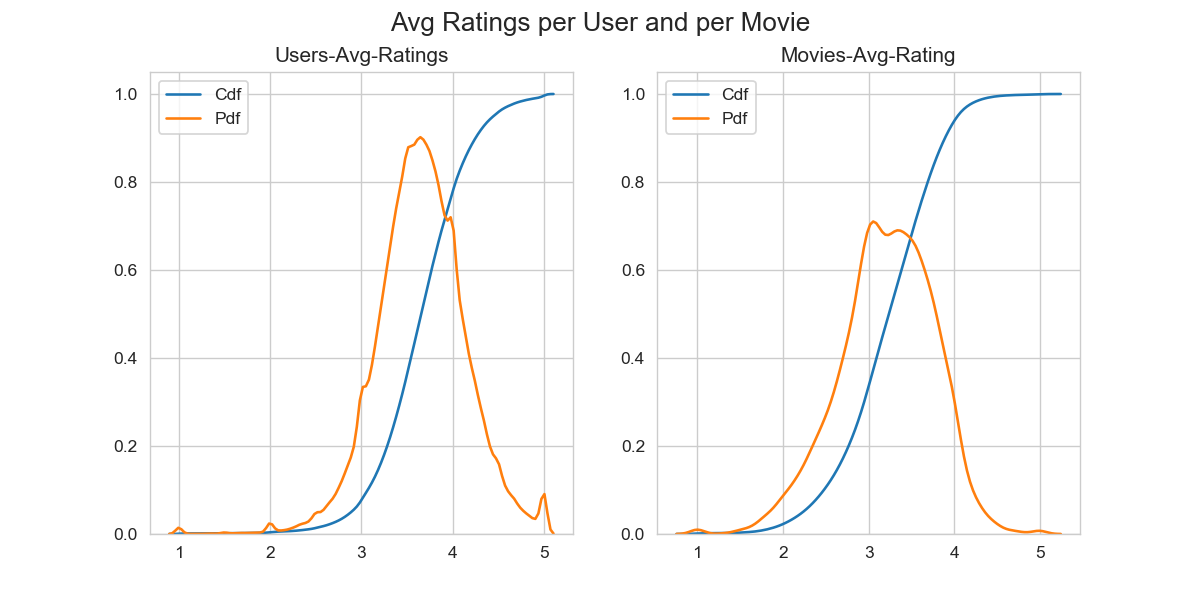

0:00:51.370271


In [38]:
start = datetime.now()
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('Users-Avg-Ratings')
# get the list of average user ratings from the averages dictionary..
user_averages = [rat for rat in train_averages['user'].values()]
sns.distplot(user_averages, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Movies-Avg-Rating')
# get the list of movie_average_ratings from the dictionary..
movie_averages = [rat for rat in train_averages['movie'].values()]
sns.distplot(movie_averages, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(movie_averages, ax=ax2, hist=False, label='Pdf')

plt.show()
print(datetime.now() - start)

<h3> 3.3.8 Cold Start problem </h3>

<h4> 3.3.8.1 Cold Start problem with Users</h4>

In [39]:
total_users = len(np.unique(df.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in train data: {}({} %) \n ".format(new_users,
                                                                        np.round((new_users/total_users)*100, 2)))


Total number of Users  : 480189

Number of Users in Train data : 405041

No of Users that didn't appear in train data: 75148(15.65 %) 
 


> We might have to handle __new users__ ( ___75148___ ) who didn't appear in train data.

<h4> 3.3.8.2 Cold Start problem with Movies</h4>

In [40]:
total_movies = len(np.unique(df.movie))
movies_train = len(train_averages['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Users in Train data :', movies_train)
print("\nNo of Movies that didn't appear in train data: {}({} %) \n ".format(new_movies,
                                                                        np.round((new_movies/total_movies)*100, 2)))


Total number of Movies  : 17770

Number of Users in Train data : 17424

No of Movies that didn't appear in train data: 346(1.95 %) 
 


> We might have to handle __346 movies__ (small comparatively) in test data

<h2> 3.4 Computing Similarity matrices </h2>

<h3> 3.4.1 Computing User-User Similarity matrix </h3>

1. Calculating User User Similarity_Matrix is __not very easy__(_unless you have huge Computing Power and lots of time_) because of number of. usersbeing lare.

    * You can try if you want to. Your system could crash or the program stops with **Memory Error**

<h4> 3.4.1.1 Trying with all dimensions (17k dimensions per user) </h4>

In [41]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 20,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken      

Computing top 100 similarities for each user..
computing done for 20 users [  time elapsed : 0:01:10.426835  ]
computing done for 40 users [  time elapsed : 0:02:21.420767  ]
computing done for 60 users [  time elapsed : 0:03:29.958355  ]
computing done for 80 users [  time elapsed : 0:04:38.691169  ]
computing done for 100 users [  time elapsed : 0:05:49.646849  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


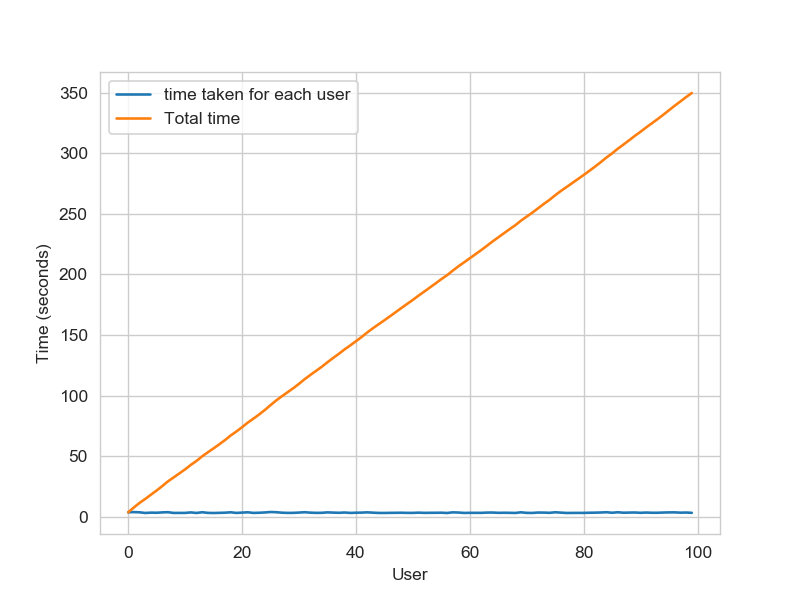

----------------------------------------------------------------------------------------------------
Time taken : 0:05:59.846856


In [42]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top = 100,verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

In [43]:
train_sparse_matrix.get_shape()

(2649430, 17771)

<h4> 3.4.1.2 Trying with reduced dimensions (Using TruncatedSVD for dimensionality reduction of user vector)</h4>

 * We have  **405,041 users** in out training set and computing similarities between them..( **17K dimensional vector..**) is time consuming..


- From above plot, It took roughly __8.88 sec__ for computing simlilar users for __one user__
    
    
- We have __405,041 users__ with us in training set.


- ${ 405041 \times 8.88 = 3596764.08  \sec } =  59946.068 \min = 999.101133333 \text{ hours}
= 41.629213889 \text{ days}...$

    - Even if we run on 4 cores parallelly (a typical system now a days), It will still take almost __10 and 1/2__ days.
    
 IDEA:  Instead, we will try to reduce the dimentsions using SVD, so that __it might__ speed up the process...

In [44]:
start = datetime.now()

# initilaize the algorithm with some parameters..
# All of them are default except n_components. n_itr is for Randomized SVD solver.
netflix_svd = TruncatedSVD(n_components=100, algorithm='randomized', random_state=15)
trunc_svd = netflix_svd.fit_transform(train_sparse_matrix)

print(datetime.now()-start)

0:03:21.892719


Here,


- $\sum \longleftarrow$ (netflix\_svd.**singular\_values\_** )


- $\bigvee^T \longleftarrow$ (netflix\_svd.**components_**)


- $\bigcup$ is not returned. instead **Projection_of_X** onto the new vectorspace is returned. 


- It uses **randomized svd** internally, which returns **All 3 of them saperately**. Use that instead.. 

In [45]:
expl_var = np.cumsum(netflix_svd.explained_variance_ratio_)

<IPython.core.display.Javascript object>


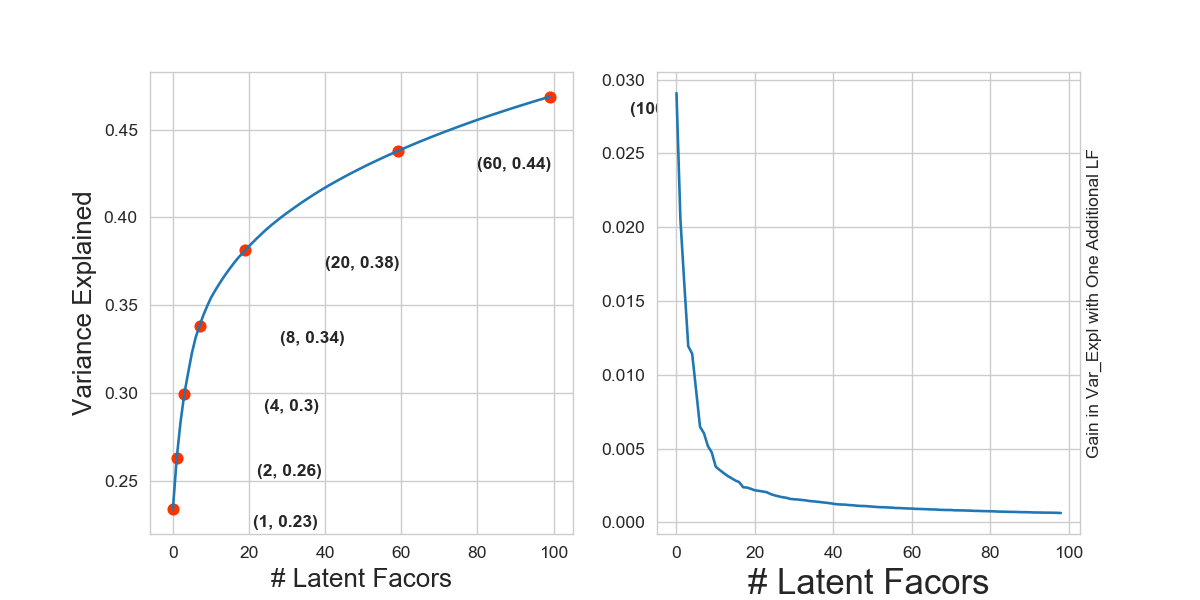

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))

ax1.set_ylabel("Variance Explained", fontsize=15)
ax1.set_xlabel("# Latent Facors", fontsize=15)
ax1.plot(expl_var)
# annote some (latentfactors, expl_var) to make it clear
ind = [1, 2,4,8,20, 60, 100]
ax1.scatter(x = [i-1 for i in ind], y = expl_var[[i-1 for i in ind]], c='#ff3300')
for i in ind:
    ax1.annotate(s ="({}, {})".format(i,  np.round(expl_var[i-1], 2)), xy=(i-1, expl_var[i-1]),
                xytext = ( i+20, expl_var[i-1] - 0.01), fontweight='bold')

change_in_expl_var = [expl_var[i+1] - expl_var[i] for i in range(len(expl_var)-1)]
ax2.plot(change_in_expl_var)



ax2.set_ylabel("Gain in Var_Expl with One Additional LF", fontsize=10)
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("# Latent Facors", fontsize=20)

plt.show()

In [47]:
for i in ind:
    print("({}, {})".format(i, np.round(expl_var[i-1], 2)))

(1, 0.23)
(2, 0.26)
(4, 0.3)
(8, 0.34)
(20, 0.38)
(60, 0.44)
(100, 0.47)


In [48]:
# Let's project our Original U_M matrix into into 500 Dimensional space...
start = datetime.now()
trunc_matrix = train_sparse_matrix.dot(netflix_svd.components_.T)
print(datetime.now()- start)

0:00:04.534866


In [49]:
type(trunc_matrix), trunc_matrix.shape

(numpy.ndarray, (2649430, 100))

* Let's convert this to actual sparse matrix and store it for future purposes

In [50]:
if not os.path.isfile('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/trunc_sparse_matrix.npz'):
    # create that sparse sparse matrix
    trunc_sparse_matrix = sparse.csr_matrix(trunc_matrix)
    # Save this truncated sparse matrix for later usage..
    sparse.save_npz('trunc_sparse_matrix', trunc_sparse_matrix)
else:
    trunc_sparse_matrix = sparse.load_npz('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/trunc_sparse_matrix.npz')

In [51]:
trunc_sparse_matrix.shape

(2649430, 100)

Computing top 50 similarities for each user..
computing done for 10 users [  time elapsed : 0:00:12.743978  ]
computing done for 20 users [  time elapsed : 0:00:26.991772  ]
computing done for 30 users [  time elapsed : 0:00:43.180316  ]
computing done for 40 users [  time elapsed : 0:00:56.006417  ]
computing done for 50 users [  time elapsed : 0:01:08.953996  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


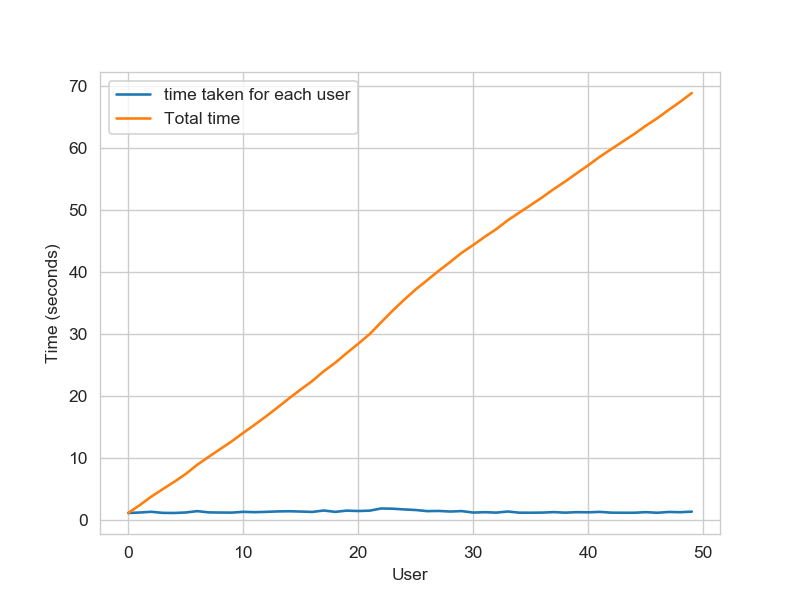

--------------------------------------------------
time: 0:01:14.095297


In [52]:
start = datetime.now()
trunc_u_u_sim_matrix, _ = compute_user_similarity(trunc_sparse_matrix, compute_for_few=True, top=50, verbose=True, 
                                                 verb_for_n_rows=10)
print("-"*50)
print("time:",datetime.now()-start)

**: This is taking more time for each user than Original one.**

- from above plot, It took almost __12.18__ for computing simlilar users for __one user__
    
    
- We have __405041 users__ with us in training set.


- ${ 405041 \times 12.18 ==== 4933399.38 \sec } ====  82223.323 \min ==== 1370.388716667 \text{ hours}
==== 57.099529861 \text{ days}...$

    - Even we run on 4 cores parallelly (a typical system now a days), It will still take almost __(14 - 15) __ days.
    


- __Why did this happen...??__


    - Just think about it. It's not that difficult.

---------------------------------_( sparse & dense..................get it ?? )_-----------------------------------

-An alternative is to compute similar users for a particular user,  whenenver required (**ie., Run time**)
    - We maintain a binary Vector for users, which tells us whether we already computed or not..
    - ***If not*** : 
        - Compute top (let's just say, 1000) most similar users for this given user, and add this to our datastructure, so that we can just access it(similar users) without recomputing it again.
        - 
    - ***If It is already Computed***:
        - Just get it directly from our datastructure, which has that information.
        - In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ). 
        - 
    - ***Which datastructure to use:***
        - It is purely implementation dependant. 
        - One simple method is to maintain a **Dictionary Of Dictionaries**.
            - 
            - **key    :** _userid_ 
            - __value__: _Again a dictionary_
                - __key__  : _Similar User_
                - __value__: _Similarity Value_


# 3.4.2 Computing Movie-Movie Similarity matrix

In [53]:
start = datetime.now()
if not os.path.isfile('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("E:/BOOKS NEW/Cases datasets/4. Netflix Prize/m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("E:/BOOKS NEW/Cases datasets/4. Netflix Prize/m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It is there, We will get it.
Done ...
It's a  (17771, 17771)  dimensional matrix
0:00:31.926998


In [54]:
m_m_sim_sparse.shape

(17771, 17771)

- Even though we have similarity measure of each movie, with all other movies, We generally don't care much about least similar movies.


- Most of the times, only top_xxx similar items matters. It may be 10 or 100.


- We take only those top similar movie ratings and store them  in a saperate dictionary.

In [55]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [56]:
start = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    # get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]
print(datetime.now() - start)

# just testing similar movies for movie_15
similar_movies[15]

0:00:24.539848


array([ 8279,  8013, 16528,  5927, 13105, 12049,  4424, 10193, 17590,
        4549,  3755,   590, 14059, 15144, 15054,  9584,  9071,  6349,
       16402,  3973,  1720,  5370, 16309,  9376,  6116,  4706,  2818,
         778, 15331,  1416, 12979, 17139, 17710,  5452,  2534,   164,
       15188,  8323,  2450, 16331,  9566, 15301, 13213, 14308, 15984,
       10597,  6426,  5500,  7068,  7328,  5720,  9802,   376, 13013,
        8003, 10199,  3338, 15390,  9688, 16455, 11730,  4513,   598,
       12762,  2187,   509,  5865,  9166, 17115, 16334,  1942,  7282,
       17584,  4376,  8988,  8873,  5921,  2716, 14679, 11947, 11981,
        4649,   565, 12954, 10788, 10220, 10963,  9427,  1690,  5107,
        7859,  5969,  1510,  2429,   847,  7845,  6410, 13931,  9840,
        3706], dtype=int64)

<h3> 3.4.3 Finding most similar movies using similarity matrix </h3>

__ Does Similarity really works as the way we expected...? __ <br>
_Let's pick some random movie and check for its similar movies...._

In [57]:
# First Let's load the movie details into soe dataframe..
# movie details are in 'netflix/movie_titles.csv'

movie_titles = pd.read_csv("E:/BOOKS NEW/Cases datasets/4. Netflix Prize/movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movie_titles.head()

Tokenization took: 4.88 ms
Type conversion took: 19.98 ms
Parser memory cleanup took: 0.00 ms


,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


<p style='font-size:15px'><b>Similar Movies for 'Vampire Journals'</b></p>

In [58]:
mv_id = 67

print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similarto this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Vampire Journals

It has 270 Ratings from users.

We have 17284 movies which are similarto this  and we will get only top most..


In [59]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)

<IPython.core.display.Javascript object>


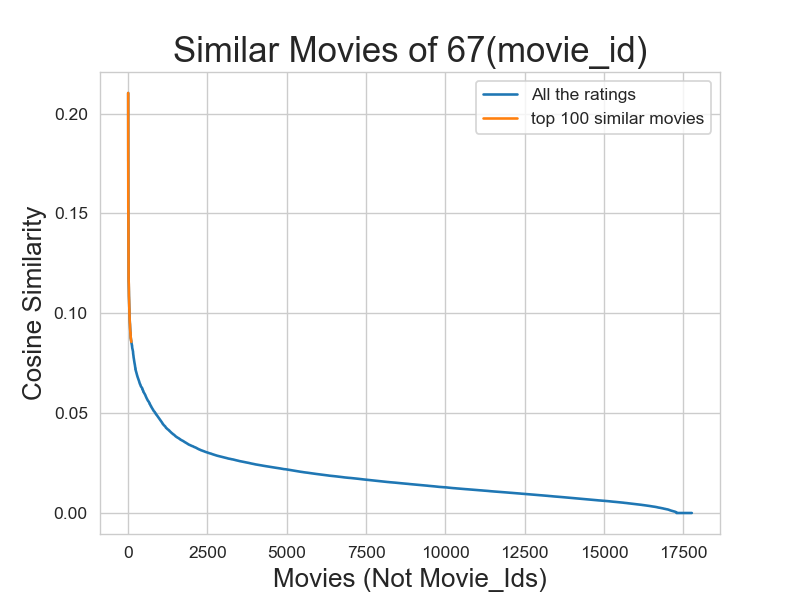

In [60]:
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

__Top 10 similar movies__

In [61]:
movie_titles.loc[sim_indices[:10]]

,year_of_release,title
movie_id,,
323,1999.0,Modern Vampires
4044,1998.0,Subspecies 4: Bloodstorm
1688,1993.0,To Sleep With a Vampire
13962,2001.0,Dracula: The Dark Prince
12053,1993.0,Dracula Rising
16279,2002.0,Vampires: Los Muertos
4667,1996.0,Vampirella
1900,1997.0,Club Vampire
13873,2001.0,The Breed


 > Similarly, we can ___find similar users___ and compare how similar they are. 

 <h1> 4.  Machine Learning Models </h1>

In [62]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose = True):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """

    # get (row, col) and (rating) tuple from sparse_matrix...
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds..
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_movies)+1))

    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

# Task 1- 25k users and 3k movies

<h2> 4.1 Sampling Data </h2>

<h3>4.1.1 Build sample train data from the train data</h3>

In [70]:
start = datetime.now()
path = "E:/BOOKS NEW/Cases datasets/4. Netflix Prize/sample_train_sparse_matrix.npz"
#if os.path.isfile(path):
#    print("It is present in your pwd, getting it from disk....")
#    # just get it from the disk instead of computing it
#    sample_train_sparse_matrix = sparse.load_npz(path)
#    print("DONE..")
#else: 
    # get 10k users and 1k movies from available data 
sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=10000, no_movies=1000,
                                             path = path)

print(datetime.now() - start)

Original Matrix : (users, movies) -- (405041 17424)
Original Matrix : Ratings -- 80384405

Sampled Matrix : (users, movies) -- (10000 1000)
Sampled Matrix : Ratings -- 129286
Saving it into disk for furthur usage..
Done..

0:01:10.804951


<h3>4.1.2 Build sample test data from the test data</h3>

In [72]:
start = datetime.now()

path = "E:/BOOKS NEW/Cases datasets/4. Netflix Prize/sample_test_sparse_matrix.npz"
#if os.path.isfile(path):
#    print("It is present in your pwd, getting it from disk....")
#    # just get it from the disk instead of computing it
#    sample_test_sparse_matrix = sparse.load_npz(path)
#    print("DONE..")
#else:
    # get 5k users and 500 movies from available data 
sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=25000, no_movies=3000,
                                                 path = path)
print(datetime.now() - start)

Original Matrix : (users, movies) -- (349312 17757)
Original Matrix : Ratings -- 20096102

Sampled Matrix : (users, movies) -- (25000 3000)
Sampled Matrix : Ratings -- 261693
Saving it into disk for furthur usage..
Done..

0:00:13.184578


<h2>4.2 Finding Global Average of all movie ratings, Average rating per User, and Average rating per Movie (from sampled train)</h2>

In [65]:
sample_train_averages = dict()

<h3>4.2.1 Finding Global Average of all movie ratings</h3>

In [66]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages

{'global': 3.5875813607223455}

## 4.2.2 Finding Average rating per User

In [67]:
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, of_users=True)
print('\nAverage rating of user 1515220 :',sample_train_averages['user'][1515220])


Average rating of user 1515220 : 3.923076923076923


## 4.2.3 Finding Average rating per Movie

In [68]:
sample_train_averages['movie'] =  get_average_ratings(sample_train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15153 :',sample_train_averages['movie'][15153])


 AVerage rating of movie 15153 : 2.752


# 4.3 Featurizing data

In [69]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 856986


 No of ratings in Our Sampled test  matrix is : 261693



## 4.3.1 Featurizing data for regression problem

### 4.3.1.1 Featurizing train data

In [74]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [75]:
############################################################
# It took me almost 10 hours to prepare this train dataset.#
############################################################
start = datetime.now()
if os.path.isfile('D:/BOOKS NEW/Cases datasets/4. Netflix Prize/reg_train.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in tqdm(zip(sample_train_users, sample_train_movies, sample_train_ratings)):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

preparing 129286 tuples for the dataset..



10000it [1:09:58,  4.23it/s]

Done for 10000 rows----- 1:10:01.020953


20000it [1:49:54,  4.61it/s]

Done for 20000 rows----- 1:49:57.432888


30000it [2:29:50,  4.65it/s]

Done for 30000 rows----- 2:29:53.300849


40000it [3:07:09,  4.59it/s]

Done for 40000 rows----- 3:07:12.406253


50000it [3:43:56,  4.71it/s]

Done for 50000 rows----- 3:43:58.893251


60000it [4:20:33,  4.69it/s]

Done for 60000 rows----- 4:20:36.041462


70000it [4:56:31,  4.66it/s]

Done for 70000 rows----- 4:56:34.452803


80000it [5:33:28,  4.60it/s]

Done for 80000 rows----- 5:33:30.875203


90000it [6:10:31,  4.71it/s]

Done for 90000 rows----- 6:10:33.851802


100000it [6:47:59,  4.70it/s]

Done for 100000 rows----- 6:48:02.617110


110000it [7:24:55,  4.53it/s]

Done for 110000 rows----- 7:24:58.327557


120000it [8:03:43,  4.68it/s]

Done for 120000 rows----- 8:03:45.903361


129286it [8:37:17,  4.17it/s]

8:37:20.388394


In [76]:
reg_train = pd.read_csv('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,53406,33,3.587581,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.408333,4.114865,4
1,99540,33,3.587581,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.142857,4.114865,3
2,99865,33,3.587581,5.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,4.0,3.642424,4.114865,5
3,101620,33,3.587581,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,3.640777,4.114865,5
4,112974,33,3.587581,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.809524,4.114865,5


-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 similar users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 similar movies rated by this movie.. )


- __UAvg__ : User's Average rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

# 4.3.1.2 Featurizing test data

In [161]:
# get users, movies and ratings from the Sampled Test 
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [162]:
sample_train_averages['global']

3.5875813607223455

In [166]:
start = datetime.now()

if os.path.isfile('D:/BOOKS NEW/Cases datasets/4. Netflix Prize/reg_test.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/reg_test.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in tqdm(zip(sample_test_users, sample_test_movies, sample_test_ratings)):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(sample_train_averages['user'][user])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(sample_train_averages['movie'][movie])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)  

0it [00:00, ?it/s]

preparing 261693 tuples for the dataset..



1000it [04:53,  3.40it/s]

Done for 1000 rows----- 0:04:53.464930


2000it [09:48,  3.47it/s]

Done for 2000 rows----- 0:09:48.601744


3000it [14:44,  3.40it/s]

Done for 3000 rows----- 0:14:44.218693


4000it [19:39,  3.40it/s]

Done for 4000 rows----- 0:19:39.478822


5000it [24:33,  3.39it/s]

Done for 5000 rows----- 0:24:34.085708


6000it [29:28,  3.40it/s]

Done for 6000 rows----- 0:29:28.973604


7000it [34:24,  3.37it/s]

Done for 7000 rows----- 0:34:24.635472


8000it [39:21,  3.25it/s]

Done for 8000 rows----- 0:39:21.589929


9000it [44:13,  3.44it/s]

Done for 9000 rows----- 0:44:13.288773


10000it [49:04,  3.46it/s]

Done for 10000 rows----- 0:49:04.364601


11000it [53:54,  3.46it/s]

Done for 11000 rows----- 0:53:54.832275


12000it [58:45,  3.45it/s]

Done for 12000 rows----- 0:58:45.522583


13000it [1:03:36,  3.44it/s]

Done for 13000 rows----- 1:03:36.375005


14000it [1:08:27,  3.43it/s]

Done for 14000 rows----- 1:08:27.266043


15000it [1:13:20,  3.38it/s]

Done for 15000 rows----- 1:13:20.283073


16000it [1:18:12,  3.45it/s]

Done for 16000 rows----- 1:18:12.151280


17000it [1:23:03,  3.43it/s]

Done for 17000 rows----- 1:23:03.948785


18000it [1:27:55,  3.32it/s]

Done for 18000 rows----- 1:27:55.487318


19000it [1:32:47,  3.45it/s]

Done for 19000 rows----- 1:32:47.342975


20000it [1:37:38,  3.43it/s]

Done for 20000 rows----- 1:37:38.742839


21000it [1:42:29,  3.45it/s]

Done for 21000 rows----- 1:42:29.953854


22000it [1:47:22,  3.41it/s]

Done for 22000 rows----- 1:47:22.119719


23000it [1:52:15,  3.43it/s]

Done for 23000 rows----- 1:52:15.972511


24000it [1:57:07,  3.44it/s]

Done for 24000 rows----- 1:57:07.655419


25000it [2:01:59,  3.45it/s]

Done for 25000 rows----- 2:01:59.127206


26000it [2:06:50,  3.45it/s]

Done for 26000 rows----- 2:06:50.569374


27000it [2:11:41,  3.46it/s]

Done for 27000 rows----- 2:11:41.281731


28000it [2:16:31,  3.45it/s]

Done for 28000 rows----- 2:16:32.070315


29000it [2:21:22,  3.45it/s]

Done for 29000 rows----- 2:21:22.731873


30000it [2:26:13,  3.42it/s]

Done for 30000 rows----- 2:26:13.801031


31000it [2:31:04,  3.44it/s]

Done for 31000 rows----- 2:31:04.211714


32000it [2:35:54,  3.45it/s]

Done for 32000 rows----- 2:35:54.629199


33000it [2:40:45,  3.36it/s]

Done for 33000 rows----- 2:40:46.017475


34000it [2:45:37,  3.44it/s]

Done for 34000 rows----- 2:45:37.469295


35000it [2:50:31,  3.30it/s]

Done for 35000 rows----- 2:50:31.259988


36000it [2:55:21,  3.44it/s]

Done for 36000 rows----- 2:55:21.294695


37000it [3:00:10,  3.47it/s]

Done for 37000 rows----- 3:00:10.189563


38000it [3:04:59,  3.48it/s]

Done for 38000 rows----- 3:04:59.800652


39000it [3:09:48,  3.43it/s]

Done for 39000 rows----- 3:09:48.479069


40000it [3:14:38,  3.45it/s]

Done for 40000 rows----- 3:14:38.407004


41000it [3:19:31,  3.43it/s]

Done for 41000 rows----- 3:19:31.339908


42000it [3:24:22,  3.44it/s]

Done for 42000 rows----- 3:24:22.938259


43000it [3:29:16,  3.47it/s]

Done for 43000 rows----- 3:29:16.502441


44000it [3:34:04,  3.48it/s]

Done for 44000 rows----- 3:34:04.625671


45000it [3:38:52,  3.49it/s]

Done for 45000 rows----- 3:38:52.726520


46000it [3:43:45,  3.43it/s]

Done for 46000 rows----- 3:43:46.046929


47000it [3:48:38,  3.45it/s]

Done for 47000 rows----- 3:48:39.016879


48000it [3:53:29,  3.43it/s]

Done for 48000 rows----- 3:53:30.010534


49000it [3:58:23,  3.46it/s]

Done for 49000 rows----- 3:58:23.867069


50000it [4:03:14,  3.41it/s]

Done for 50000 rows----- 4:03:15.060555


51000it [4:08:06,  3.44it/s]

Done for 51000 rows----- 4:08:06.662502


52000it [4:12:57,  3.45it/s]

Done for 52000 rows----- 4:12:57.262997


53000it [4:17:47,  3.42it/s]

Done for 53000 rows----- 4:17:47.961709


54000it [4:22:38,  3.42it/s]

Done for 54000 rows----- 4:22:38.412703


55000it [4:27:40,  3.40it/s]

Done for 55000 rows----- 4:27:40.097160


56000it [4:32:42,  3.32it/s]

Done for 56000 rows----- 4:32:42.301827


57000it [4:37:44,  3.34it/s]

Done for 57000 rows----- 4:37:44.905550


58000it [4:42:48,  3.29it/s]

Done for 58000 rows----- 4:42:48.193096


59000it [4:47:52,  3.28it/s]

Done for 59000 rows----- 4:47:52.706010


60000it [4:52:59,  3.30it/s]

Done for 60000 rows----- 4:52:59.763658


61000it [4:58:06,  3.29it/s]

Done for 61000 rows----- 4:58:06.600929


62000it [5:03:11,  3.29it/s]

Done for 62000 rows----- 5:03:11.764599


63000it [5:08:18,  3.35it/s]

Done for 63000 rows----- 5:08:18.970442


64000it [5:13:58,  3.31it/s]

Done for 64000 rows----- 5:13:58.303893


65000it [5:19:12,  3.24it/s]

Done for 65000 rows----- 5:19:12.375356


66000it [5:24:56,  3.21it/s]

Done for 66000 rows----- 5:24:56.674799


67000it [5:30:24,  3.20it/s]

Done for 67000 rows----- 5:30:24.693999


68000it [5:35:50,  3.11it/s]

Done for 68000 rows----- 5:35:50.436912


69000it [5:41:25,  2.10it/s]

Done for 69000 rows----- 5:41:25.693648


70000it [5:47:01,  1.95it/s]

Done for 70000 rows----- 5:47:01.582038


71000it [5:53:04,  2.37it/s]

Done for 71000 rows----- 5:53:04.153760


72000it [5:58:06,  3.37it/s]

Done for 72000 rows----- 5:58:06.620051


73000it [6:03:09,  3.37it/s]

Done for 73000 rows----- 6:03:09.360272


74000it [6:08:12,  3.34it/s]

Done for 74000 rows----- 6:08:12.807577


75000it [6:13:21,  3.35it/s]

Done for 75000 rows----- 6:13:21.484347


76000it [6:18:30,  3.30it/s]

Done for 76000 rows----- 6:18:31.089653


77000it [6:23:58,  3.19it/s]

Done for 77000 rows----- 6:23:59.009509


78000it [6:28:56,  3.44it/s]

Done for 78000 rows----- 6:28:56.242840


79000it [6:33:49,  3.40it/s]

Done for 79000 rows----- 6:33:49.175892


80000it [6:38:44,  3.41it/s]

Done for 80000 rows----- 6:38:44.241490


81000it [6:43:36,  3.42it/s]

Done for 81000 rows----- 6:43:37.006837


82000it [6:48:29,  3.35it/s]

Done for 82000 rows----- 6:48:30.036435


83000it [6:53:22,  3.44it/s]

Done for 83000 rows----- 6:53:22.524687


84000it [6:58:15,  3.39it/s]

Done for 84000 rows----- 6:58:15.275481


85000it [7:03:09,  3.45it/s]

Done for 85000 rows----- 7:03:09.102045


86000it [7:08:02,  3.35it/s]

Done for 86000 rows----- 7:08:02.095156


87000it [7:12:54,  3.42it/s]

Done for 87000 rows----- 7:12:54.225316


88000it [7:17:50,  3.38it/s]

Done for 88000 rows----- 7:17:50.447905


89000it [7:22:46,  3.42it/s]

Done for 89000 rows----- 7:22:46.758285


90000it [7:27:46,  3.38it/s]

Done for 90000 rows----- 7:27:47.077309


91000it [7:32:39,  3.43it/s]

Done for 91000 rows----- 7:32:39.989649


92000it [7:37:31,  3.42it/s]

Done for 92000 rows----- 7:37:32.028351


93000it [7:42:24,  3.44it/s]

Done for 93000 rows----- 7:42:24.178335


94000it [7:47:16,  3.42it/s]

Done for 94000 rows----- 7:47:16.628973


95000it [7:52:09,  3.42it/s]

Done for 95000 rows----- 7:52:09.264853


96000it [7:57:02,  3.37it/s]

Done for 96000 rows----- 7:57:02.126981


97000it [8:01:54,  3.39it/s]

Done for 97000 rows----- 8:01:54.681689


98000it [8:06:49,  3.41it/s]

Done for 98000 rows----- 8:06:50.026485


99000it [8:11:45,  3.43it/s]

Done for 99000 rows----- 8:11:45.631853


100000it [8:16:38,  3.42it/s]

Done for 100000 rows----- 8:16:38.511992


101000it [8:21:30,  3.43it/s]

Done for 101000 rows----- 8:21:30.979661


102000it [8:26:26,  3.43it/s]

Done for 102000 rows----- 8:26:26.778106


103000it [8:31:18,  3.41it/s]

Done for 103000 rows----- 8:31:18.985415


104000it [8:36:15,  3.42it/s]

Done for 104000 rows----- 8:36:15.496857


105000it [8:41:10,  3.38it/s]

Done for 105000 rows----- 8:41:10.164211


106000it [8:46:03,  3.40it/s]

Done for 106000 rows----- 8:46:03.890931


107000it [8:50:56,  3.40it/s]

Done for 107000 rows----- 8:50:56.687423


108000it [8:55:51,  3.40it/s]

Done for 108000 rows----- 8:55:51.108899


109000it [9:00:44,  3.40it/s]

Done for 109000 rows----- 9:00:44.829513


110000it [9:05:37,  3.43it/s]

Done for 110000 rows----- 9:05:37.154322


111000it [9:10:29,  3.37it/s]

Done for 111000 rows----- 9:10:29.340905


112000it [9:15:21,  3.44it/s]

Done for 112000 rows----- 9:15:21.635337


113000it [9:20:14,  3.42it/s]

Done for 113000 rows----- 9:20:14.408948


114000it [9:25:07,  3.40it/s]

Done for 114000 rows----- 9:25:07.191606


115000it [9:30:01,  3.31it/s]

Done for 115000 rows----- 9:30:02.058844


116000it [9:34:55,  3.37it/s]

Done for 116000 rows----- 9:34:55.721029


117000it [9:39:50,  3.39it/s]

Done for 117000 rows----- 9:39:50.242596


118000it [9:44:43,  3.42it/s]

Done for 118000 rows----- 9:44:43.356112


119000it [9:49:35,  3.44it/s]

Done for 119000 rows----- 9:49:35.743301


120000it [9:54:28,  3.42it/s]

Done for 120000 rows----- 9:54:28.438154


121000it [9:59:20,  3.42it/s]

Done for 121000 rows----- 9:59:20.540480


122000it [10:04:12,  3.43it/s]

Done for 122000 rows----- 10:04:12.972352


123000it [10:09:08,  3.34it/s]

Done for 123000 rows----- 10:09:08.372422


124000it [10:14:01,  3.36it/s]

Done for 124000 rows----- 10:14:01.841111


125000it [10:18:54,  3.41it/s]

Done for 125000 rows----- 10:18:54.487264


126000it [10:23:46,  3.43it/s]

Done for 126000 rows----- 10:23:46.534312


127000it [10:28:38,  3.43it/s]

Done for 127000 rows----- 10:28:38.929714


128000it [10:33:30,  3.44it/s]

Done for 128000 rows----- 10:33:31.067869


129000it [10:38:23,  3.45it/s]

Done for 129000 rows----- 10:38:23.239037


130000it [10:43:15,  3.43it/s]

Done for 130000 rows----- 10:43:15.203407


131000it [10:48:07,  3.42it/s]

Done for 131000 rows----- 10:48:07.538535


132000it [10:53:00,  3.43it/s]

Done for 132000 rows----- 10:53:00.811187


133000it [10:57:53,  3.41it/s]

Done for 133000 rows----- 10:57:54.032154


134000it [11:02:46,  3.39it/s]

Done for 134000 rows----- 11:02:46.577636


135000it [11:07:38,  3.42it/s]

Done for 135000 rows----- 11:07:38.559340


136000it [11:12:30,  3.44it/s]

Done for 136000 rows----- 11:12:30.591514


137000it [11:17:23,  3.43it/s]

Done for 137000 rows----- 11:17:23.868971


138000it [11:22:16,  3.42it/s]

Done for 138000 rows----- 11:22:16.600186


139000it [11:27:09,  3.43it/s]

Done for 139000 rows----- 11:27:09.120479


140000it [11:32:01,  3.37it/s]

Done for 140000 rows----- 11:32:01.707169


141000it [11:36:54,  3.42it/s]

Done for 141000 rows----- 11:36:54.275629


142000it [11:41:46,  3.43it/s]

Done for 142000 rows----- 11:41:46.517487


143000it [11:46:38,  3.43it/s]

Done for 143000 rows----- 11:46:38.938412


144000it [11:51:31,  3.41it/s]

Done for 144000 rows----- 11:51:31.470209


145000it [11:56:23,  3.44it/s]

Done for 145000 rows----- 11:56:23.623027


146000it [12:01:15,  3.45it/s]

Done for 146000 rows----- 12:01:15.962747


147000it [12:06:09,  3.39it/s]

Done for 147000 rows----- 12:06:10.005158


148000it [12:11:04,  3.40it/s]

Done for 148000 rows----- 12:11:04.851110


149000it [12:15:57,  3.38it/s]

Done for 149000 rows----- 12:15:57.439908


150000it [12:20:49,  3.41it/s]

Done for 150000 rows----- 12:20:49.486580


151000it [12:25:41,  3.42it/s]

Done for 151000 rows----- 12:25:41.344164


152000it [12:30:33,  3.41it/s]

Done for 152000 rows----- 12:30:33.446616


153000it [12:35:25,  3.42it/s]

Done for 153000 rows----- 12:35:25.502790


154000it [12:40:16,  3.44it/s]

Done for 154000 rows----- 12:40:17.060159


155000it [12:45:09,  3.39it/s]

Done for 155000 rows----- 12:45:09.380105


156000it [12:50:03,  3.38it/s]

Done for 156000 rows----- 12:50:03.169450


157000it [12:54:56,  3.42it/s]

Done for 157000 rows----- 12:54:56.292045


158000it [12:59:49,  3.42it/s]

Done for 158000 rows----- 12:59:49.364752


159000it [13:04:41,  3.42it/s]

Done for 159000 rows----- 13:04:41.373079


160000it [13:09:33,  3.42it/s]

Done for 160000 rows----- 13:09:33.120014


161000it [13:14:25,  3.35it/s]

Done for 161000 rows----- 13:14:25.211756


162000it [13:19:16,  3.42it/s]

Done for 162000 rows----- 13:19:16.982297


163000it [13:24:09,  3.43it/s]

Done for 163000 rows----- 13:24:09.162576


164000it [13:29:00,  3.42it/s]

Done for 164000 rows----- 13:29:01.081600


165000it [13:33:52,  3.45it/s]

Done for 165000 rows----- 13:33:52.719062


166000it [13:38:44,  3.44it/s]

Done for 166000 rows----- 13:38:44.375970


167000it [13:43:36,  3.42it/s]

Done for 167000 rows----- 13:43:36.094554


168000it [13:48:29,  3.39it/s]

Done for 168000 rows----- 13:48:29.980487


169000it [13:53:22,  3.43it/s]

Done for 169000 rows----- 13:53:22.604000


170000it [13:58:15,  3.43it/s]

Done for 170000 rows----- 13:58:15.224715


171000it [14:03:07,  3.41it/s]

Done for 171000 rows----- 14:03:08.048575


172000it [14:08:00,  3.43it/s]

Done for 172000 rows----- 14:08:00.446758


173000it [14:12:52,  3.43it/s]

Done for 173000 rows----- 14:12:52.687115


174000it [14:17:45,  3.42it/s]

Done for 174000 rows----- 14:17:45.184900


175000it [14:22:37,  3.42it/s]

Done for 175000 rows----- 14:22:37.603668


176000it [14:27:30,  3.41it/s]

Done for 176000 rows----- 14:27:30.291579


177000it [14:32:22,  3.44it/s]

Done for 177000 rows----- 14:32:22.648379


178000it [14:37:14,  3.43it/s]

Done for 178000 rows----- 14:37:15.011891


179000it [14:42:07,  3.40it/s]

Done for 179000 rows----- 14:42:07.587225


180000it [14:47:00,  3.42it/s]

Done for 180000 rows----- 14:47:00.431228


181000it [14:51:52,  3.43it/s]

Done for 181000 rows----- 14:51:52.925402


182000it [14:56:45,  3.43it/s]

Done for 182000 rows----- 14:56:45.644518


183000it [15:01:38,  3.41it/s]

Done for 183000 rows----- 15:01:38.100103


184000it [15:06:36,  3.27it/s]

Done for 184000 rows----- 15:06:36.461469


185000it [15:11:51,  3.16it/s]

Done for 185000 rows----- 15:11:52.060341


186000it [15:17:08,  3.39it/s]

Done for 186000 rows----- 15:17:08.545541


187000it [15:22:01,  3.33it/s]

Done for 187000 rows----- 15:22:02.000962


188000it [15:26:54,  3.44it/s]

Done for 188000 rows----- 15:26:55.020582


189000it [15:31:47,  3.41it/s]

Done for 189000 rows----- 15:31:47.932773


190000it [15:36:41,  3.24it/s]

Done for 190000 rows----- 15:36:41.262836


191000it [15:41:34,  3.40it/s]

Done for 191000 rows----- 15:41:34.103007


192000it [15:46:25,  3.41it/s]

Done for 192000 rows----- 15:46:25.779714


193000it [15:51:16,  3.40it/s]

Done for 193000 rows----- 15:51:16.680863


194000it [15:56:06,  3.44it/s]

Done for 194000 rows----- 15:56:06.970081


195000it [16:00:57,  3.45it/s]

Done for 195000 rows----- 16:00:57.550356


196000it [16:05:50,  3.40it/s]

Done for 196000 rows----- 16:05:50.502156


197000it [16:10:42,  3.42it/s]

Done for 197000 rows----- 16:10:42.636496


198000it [16:15:34,  3.41it/s]

Done for 198000 rows----- 16:15:34.977311


199000it [16:20:26,  3.33it/s]

Done for 199000 rows----- 16:20:26.141613


200000it [16:25:17,  3.41it/s]

Done for 200000 rows----- 16:25:17.538653


201000it [16:30:08,  3.45it/s]

Done for 201000 rows----- 16:30:08.381005


202000it [16:35:01,  3.40it/s]

Done for 202000 rows----- 16:35:01.415978


203000it [16:39:55,  3.45it/s]

Done for 203000 rows----- 16:39:55.794086


204000it [16:44:48,  3.45it/s]

Done for 204000 rows----- 16:44:48.942577


205000it [16:49:52,  3.07it/s]

Done for 205000 rows----- 16:49:52.185593


206000it [16:54:55,  3.39it/s]

Done for 206000 rows----- 16:54:55.615352


207000it [16:59:49,  3.40it/s]

Done for 207000 rows----- 16:59:50.008275


208000it [17:04:43,  3.44it/s]

Done for 208000 rows----- 17:04:43.419646


209000it [17:09:48,  3.42it/s]

Done for 209000 rows----- 17:09:48.435400


210000it [17:14:44,  3.30it/s]

Done for 210000 rows----- 17:14:44.544595


211000it [17:19:49,  3.21it/s]

Done for 211000 rows----- 17:19:49.753992


212000it [17:24:57,  3.21it/s]

Done for 212000 rows----- 17:24:58.068996


213000it [17:30:17,  3.37it/s]

Done for 213000 rows----- 17:30:17.839548


214000it [17:35:42,  3.37it/s]

Done for 214000 rows----- 17:35:43.072704


215000it [17:40:52,  3.44it/s]

Done for 215000 rows----- 17:40:52.555935


216000it [17:45:59,  3.35it/s]

Done for 216000 rows----- 17:45:59.608770


217000it [17:51:03,  3.41it/s]

Done for 217000 rows----- 17:51:03.702365


218000it [17:56:03,  3.16it/s]

Done for 218000 rows----- 17:56:03.110878


219000it [18:01:02,  3.34it/s]

Done for 219000 rows----- 18:01:02.273968


220000it [18:06:11,  3.35it/s]

Done for 220000 rows----- 18:06:12.016550


221000it [18:11:12,  3.23it/s]

Done for 221000 rows----- 18:11:12.430200


222000it [18:16:17,  3.35it/s]

Done for 222000 rows----- 18:16:17.465217


223000it [18:21:36,  2.57it/s]

Done for 223000 rows----- 18:21:36.855689


224000it [18:26:50,  3.37it/s]

Done for 224000 rows----- 18:26:50.555676


225000it [18:31:57,  3.37it/s]

Done for 225000 rows----- 18:31:57.308876


226000it [18:37:36,  3.37it/s]

Done for 226000 rows----- 18:37:36.283731


227000it [18:42:44,  3.26it/s]

Done for 227000 rows----- 18:42:45.077955


228000it [18:47:55,  3.37it/s]

Done for 228000 rows----- 18:47:55.392184


229000it [18:53:12,  2.24it/s]

Done for 229000 rows----- 18:53:12.393034


230000it [18:58:43,  3.04it/s]

Done for 230000 rows----- 18:58:43.764846


231000it [19:04:07,  3.30it/s]

Done for 231000 rows----- 19:04:07.376235


232000it [19:09:20,  3.43it/s]

Done for 232000 rows----- 19:09:20.611299


233000it [19:14:22,  3.44it/s]

Done for 233000 rows----- 19:14:22.913986


234000it [19:19:15,  3.44it/s]

Done for 234000 rows----- 19:19:15.897526


235000it [19:24:07,  3.45it/s]

Done for 235000 rows----- 19:24:07.721883


236000it [19:28:58,  3.42it/s]

Done for 236000 rows----- 19:28:58.903867


237000it [19:33:49,  3.46it/s]

Done for 237000 rows----- 19:33:49.708762


238000it [19:38:40,  3.46it/s]

Done for 238000 rows----- 19:38:40.726379


239000it [19:43:38,  2.80it/s]

Done for 239000 rows----- 19:43:38.964873


240000it [19:49:32,  2.52it/s]

Done for 240000 rows----- 19:49:33.081988


241000it [19:55:37,  2.63it/s]

Done for 241000 rows----- 19:55:37.895865


242000it [20:01:01,  3.40it/s]

Done for 242000 rows----- 20:01:01.266092


243000it [20:05:55,  3.43it/s]

Done for 243000 rows----- 20:05:55.904452


244000it [20:10:47,  3.43it/s]

Done for 244000 rows----- 20:10:47.870466


245000it [20:15:42,  3.42it/s]

Done for 245000 rows----- 20:15:42.300845


246000it [20:20:36,  3.38it/s]

Done for 246000 rows----- 20:20:36.969552


247000it [20:25:55,  3.35it/s]

Done for 247000 rows----- 20:25:55.790999


248000it [20:31:00,  3.33it/s]

Done for 248000 rows----- 20:31:00.492151


249000it [20:35:59,  3.33it/s]

Done for 249000 rows----- 20:35:59.953941


250000it [20:40:59,  3.36it/s]

Done for 250000 rows----- 20:40:59.229624


251000it [20:46:03,  3.29it/s]

Done for 251000 rows----- 20:46:03.887515


252000it [20:51:02,  3.32it/s]

Done for 252000 rows----- 20:51:02.840776


253000it [20:56:06,  3.31it/s]

Done for 253000 rows----- 20:56:06.755399


254000it [21:01:14,  2.96it/s]

Done for 254000 rows----- 21:01:14.439829


255000it [21:06:22,  3.32it/s]

Done for 255000 rows----- 21:06:22.815774


256000it [21:11:28,  3.34it/s]

Done for 256000 rows----- 21:11:28.167842


257000it [21:16:37,  3.31it/s]

Done for 257000 rows----- 21:16:37.778363


258000it [21:21:51,  3.32it/s]

Done for 258000 rows----- 21:21:51.891161


259000it [21:27:01,  3.25it/s]

Done for 259000 rows----- 21:27:01.650732


260000it [21:32:16,  3.28it/s]

Done for 260000 rows----- 21:32:16.425876


261000it [21:37:32,  3.23it/s]

Done for 261000 rows----- 21:37:32.462460


261693it [21:41:08,  3.35it/s]

 21:41:08.631255


In [80]:
reg_test_df = pd.read_csv('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3
1,3321,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,4
2,368977,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,5
3,508584,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3


-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 simiular users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 simiular movies rated by this movie.. )


- __UAvg__ : User AVerage rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

## 4.3.2 Transforming data for Surprise models

In [77]:
from surprise import Reader, Dataset

<h4> 4.3.2.1 Transforming train data </h4>

- We can't give raw data (movie, user, rating) to train the model in Surprise library.


- They have a saperate format for TRAIN and TEST data, which will be useful for training the models like SVD, KNNBaseLineOnly....etc..,in Surprise.


- We can form the trainset from a file, or from a Pandas  DataFrame. 
http://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py 

In [78]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

<h4> 4.3.2.2 Transforming test data </h4>

- Testset is just a list of (user, movie, rating) tuples. (Order in the tuple is impotant) 

In [81]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(1129620, 2, 3), (3321, 5, 4), (368977, 5, 5)]

# Task 2 Hyper parameter tuning

# 4.4 Applying Machine Learning models

-  Global dictionary that stores rmse and mape for all the models....

    - It stores the metrics in a dictionary of dictionaries

    > __keys__ : model names(string)

    > __value__: dict(__key__ : metric, __value__ : value ) 

In [82]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

 > __Utility functions for running regression models__

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
# to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
###################################################################
def run_xgboost(algo,x_train, y_train, x_test, y_test, verbose=True,param_tuning=True):
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    if param_tuning:
        params = {
             'learning_rate': [0.01,0.05,0.2,0.3],
             'n_estimators': [50,100,400,800],
             'max_depth': [5, 7,9],
             'colsample_bytree': [0.5, 0.7,1],
        }
        
        xgb_clf = RandomizedSearchCV(algo, param_distributions=params, verbose=2, n_jobs=-1, cv=2,
                                       scoring=['neg_mean_squared_error', 'neg_mean_absolute_error','explained_variance', 'r2'],
                                       refit='neg_mean_squared_error')
        model = xgb_clf
        
        model.fit(x_train, y_train)
        
        # Get the training results
        y_train_pred = model.predict(x_train)
        rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
        train_results = {'rmse': rmse_train,'mape' : mape_train,'predictions':y_train_pred}

        # Get the testing results
        y_test_pred = model.predict(x_test) 
        rmse_test, mape_test = get_error_metrics(y_test.values, y_test_pred)
        test_results = {'rmse': rmse_test,'mape' : mape_test,'predictions':y_test_pred}
        
    else:
        model = algo
        model.fit(x_train, y_train, eval_metric='rmse', verbose=True)
        #xgb_model = algo.best_estimator_
        
        # Get the training results
        y_train_pred = model.predict(x_train)
        rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
        train_results = {'rmse': rmse_train,'mape' : mape_train,'predictions':y_train_pred}

        # Get the testing results
        y_test_pred = model.predict(x_test) 
        rmse_test, mape_test = get_error_metrics(y_test.values, y_test_pred)
        test_results = {'rmse': rmse_test,'mape' : mape_test,'predictions':y_test_pred}
        
    return train_results, test_results,model

> __Utility functions for Surprise modes__

In [84]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

## 4.4.1 XGBoost with initial 13 features 

In [88]:
import xgboost as xgb


# prepare Train data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=15)
train_results, test_results,model = run_xgboost(first_xgb, x_train, y_train, x_test, y_test,param_tuning=True)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   13.9s remaining:   20.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   52.2s finished


[06:17:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [89]:
model_feat = model.best_estimator_.feature_importances_
index = np.arange(len(model_feat))

<IPython.core.display.Javascript object>


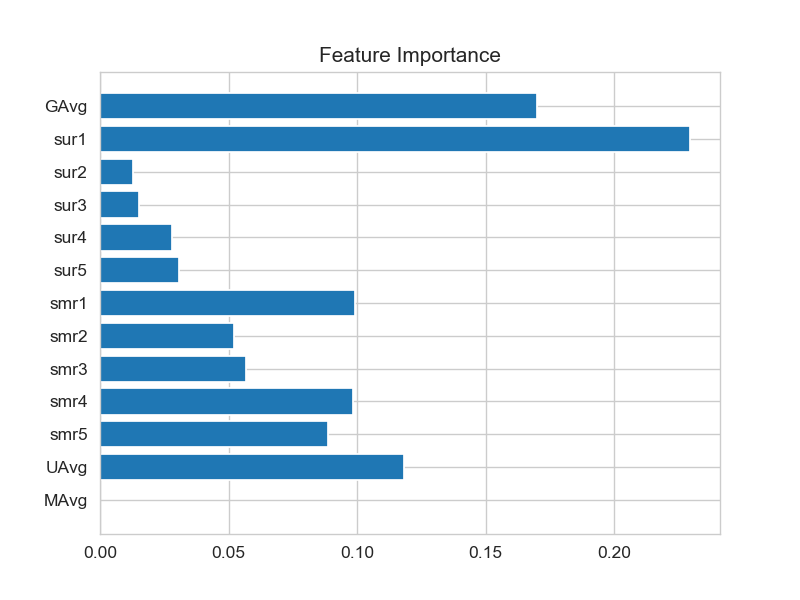

In [90]:
plt.barh(index,model_feat)
plt.yticks(index[::-1],reg_train.columns.drop(['user','movie','rating']).values)
plt.title('Feature Importance')
plt.show()

In [91]:
print('RMSE of the model ',models_evaluation_test['first_algo']['rmse'])
print('MAPE of the model ',models_evaluation_test['first_algo']['mape'])

RMSE of the model  1.0834830215885431
MAPE of the model  34.24178377637676


In [92]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## 4.4.2 Suprise BaselineModel

In [93]:
from surprise import BaselineOnly 

__Predicted_rating : ( baseline prediction ) __

    -  http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly 
 >$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $


- $\pmb \mu $ : Average of all trainings in training data.
- $\pmb b_u$ : User bias
- $\pmb b_i$ : Item bias (movie biases) 

__Optimization function ( Least Squares Problem ) __

    - http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration 

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$ 

In [94]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)


# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.652221 

Evaluating the model with train data..
time taken : 0:00:00.707166
---------------
Train Data
---------------
RMSE : 0.9347153928678286

MAPE : 29.389572652358183

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:01.809161
---------------
Test Data
---------------
RMSE : 1.0870675945776358

MAPE : 34.279025130371885

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:03.168548


<h3> 4.4.3 XGBoost with initial 13 features + Surprise Baseline predictor </h3>

__Updating Train Data__

In [95]:
# add our baseline_predicted value as our feature..
reg_train['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,53406,33,3.587581,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.408333,4.114865,4,3.898982
1,99540,33,3.587581,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.142857,4.114865,3,3.371403


__Updating Test Data__

In [96]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3,3.581679
1,3321,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,4,3.581679


In [99]:
x_train = reg_train.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results,model = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test,param_tuning=True)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   33.2s remaining:   49.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


[06:26:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [100]:
model_bsl_feat = model.best_estimator_.feature_importances_
index = np.arange(len(model_bsl_feat))

<IPython.core.display.Javascript object>


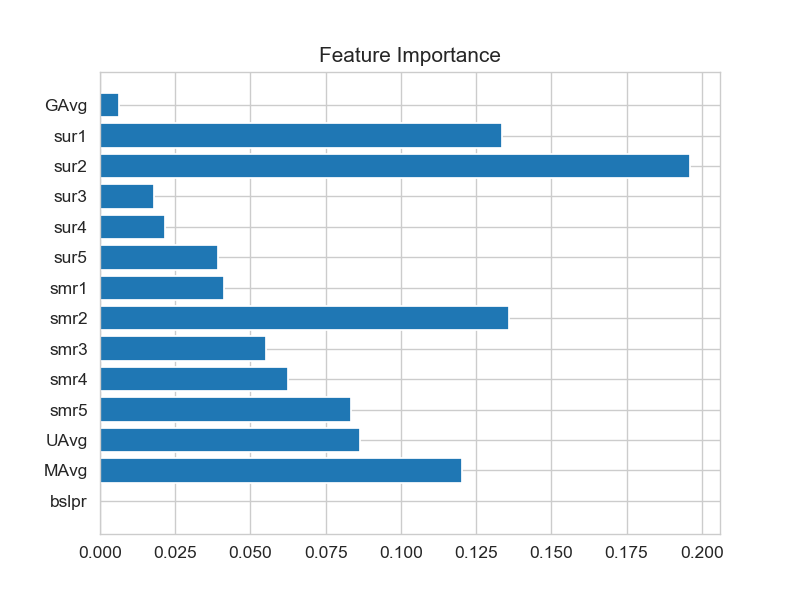

In [101]:
plt.barh(index,model_bsl_feat)
plt.yticks(index[::-1],reg_train.columns.drop(['user','movie','rating']).values)
plt.title('Feature Importance')
plt.show()

<h3> 4.4.4 Surprise KNNBaseline predictor </h3>

In [103]:
from surprise import KNNBaseline

- KNN BASELINE
    - http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline 
    
 - PEARSON_BASELINE SIMILARITY
    - http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline 
 
 - SHRINKAGE
    - _2.2 Neighborhood Models_ in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf 
    
 - __predicted Rating__ : ( ___ based on User-User similarity ___ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

- $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating

- $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__  

- _sim (u, v)_ - __Similarity__ between users __u and v__  
    - Generally, it will be cosine similarity or Pearson correlation coefficient. 
    - But we use __shrunk Pearson-baseline correlation coefficient__, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)
 
- __ Predicted rating __ ( based on Item Item similarity ):
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}

    -  ___Notations follows same as above (user user based predicted rating ) ___

  <h4> 4.4.4.1 Surprise KNNBaseline with user user similarities</h4>

In [104]:
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:32.730665 

Evaluating the model with train data..
time taken : 0:01:17.252911
---------------
Train Data
---------------
RMSE : 0.33642097416508826

MAPE : 9.145093375416348

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:02.027598
---------------
Test Data
---------------
RMSE : 1.0868930924141922

MAPE : 34.2648242978909

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:01:52.012133


<h4> 4.4.4.2 Surprise KNNBaseline with movie movie similarities</h4>

In [105]:
sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}

knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results 
models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:01.110993 

Evaluating the model with train data..
time taken : 0:00:07.481591
---------------
Train Data
---------------
RMSE : 0.32584796251610554

MAPE : 8.447062581998374

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:02.021559
---------------
Test Data
---------------
RMSE : 1.0869572969858712

MAPE : 34.26667689410217

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:10.615138


<h3> 4.4.5 XGBoost with initial 13 features + Surprise Baseline predictor + KNNBaseline predictor </h3>

- - - First we will run XGBoost with predictions from both KNN's ( that uses User\_User and Item\_Item similarities along with our previous features.

 
- - - Then we will run XGBoost with just predictions form both knn models and preditions from our baseline model. 

### Preparing the Train Data

In [106]:
# add the predicted values from both knns to this dataframe
reg_train['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,53406,33,3.587581,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.408333,4.114865,4,3.898982,3.93002,3.867958
1,99540,33,3.587581,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.142857,4.114865,3,3.371403,3.17733,3.076302


### Preparing Test data

In [107]:
reg_test_df['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test_df['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3,3.581679,3.581679,3.581679
1,3321,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,4,3.581679,3.581679,3.581679


In [109]:
x_train = reg_train.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
xgb_knn_bsl = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results,model = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test,param_tuning=True)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   20.3s remaining:   30.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


[06:36:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [110]:
model_knn_bsl_feat = model.best_estimator_.feature_importances_
index = np.arange(len(model_knn_bsl_feat))

<IPython.core.display.Javascript object>


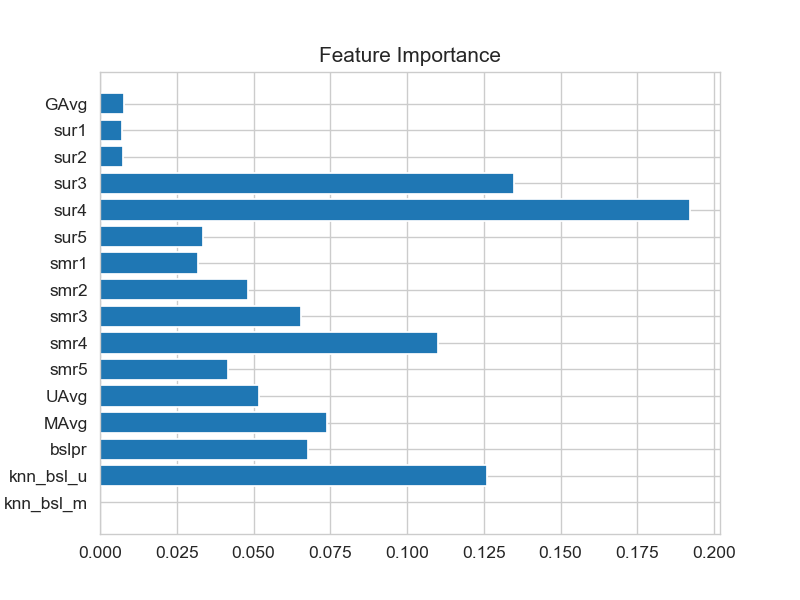

In [111]:
plt.barh(index,model_knn_bsl_feat)
plt.yticks(index[::-1],reg_train.columns.drop(['user','movie','rating']).values)
plt.title('Feature Importance')
plt.show()

In [113]:
print('RMSE of the model ',models_evaluation_test['first_algo']['rmse'])
print('MAPE of the model ',models_evaluation_test['first_algo']['mape'])

RMSE of the model  1.0834830215885431
MAPE of the model  34.24178377637676


In [114]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=13, nthread=None, objective='reg:linear', random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=False, subsample=1, verbosity=1)

<h3> 4.4.6 Matrix Factorization Techniques </h3>

<h4> 4.4.6.1 SVD Matrix Factorization User Movie intractions </h4>

In [112]:
from surprise import SVD

http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD 

- __ Predicted Rating : __
    - 
    - $ \large  \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $
    
        - $\pmb q_i$ - Representation of item(movie) in latent factor space
        
        - $\pmb p_u$ - Representation of user in new latent factor space
        
- A BASIC MATRIX FACTORIZATION MODEL in  https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $\large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $

In [115]:
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:06.270281 

Evaluating the model with train data..
time taken : 0:00:01.047138
---------------
Train Data
---------------
RMSE : 0.6574721240954099

MAPE : 19.704901088660478

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:01.903939
---------------
Test Data
---------------
RMSE : 1.086920556350756

MAPE : 34.2640855964798

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:09.221358


  <h4> 4.4.6.2 SVD Matrix Factorization with implicit feedback from user ( user rated movies ) </h4>

In [116]:
from surprise import SVDpp

- ----->  2.5 Implicit Feedback in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf

- __ Predicted Rating : __
    - 
    - $ \large \hat{r}_{ui} = \mu + b_u + b_i + q_i^T\left(p_u +
    |I_u|^{-\frac{1}{2}} \sum_{j \in I_u}y_j\right) $ 
    
 - $ \pmb{I_u}$ --- the set of all items rated by user u

- $\pmb{y_j}$ --- Our new set of item factors that capture implicit ratings.  

In [117]:
svdpp = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results

Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:01:33.860101 

Evaluating the model with train data..
time taken : 0:00:04.788162
---------------
Train Data
---------------
RMSE : 0.6032438403305899

MAPE : 17.49285063490268

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:01.976676
---------------
Test Data
---------------
RMSE : 1.0871683578478946

MAPE : 34.28175061176099

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:01:40.624939


<h3> 4.4.7 XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

__Preparing Train data__

In [118]:
# add the predicted values from both knns to this dataframe
reg_train['svd'] = models_evaluation_train['svd']['predictions']
reg_train['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,53406,33,3.587581,4.0,5.0,5.0,4.0,1.0,5.0,2.0,...,3.0,1.0,3.408333,4.114865,4,3.898982,3.93002,3.867958,4.303764,3.621664
1,99540,33,3.587581,5.0,5.0,5.0,4.0,5.0,3.0,4.0,...,3.0,5.0,3.142857,4.114865,3,3.371403,3.17733,3.076302,3.278967,3.538247


__Preparing Test data  __

In [119]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,...,3.587581,3.587581,3.587581,3.587581,3,3.581679,3.581679,3.581679,3.581679,3.581679
1,3321,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,...,3.587581,3.587581,3.587581,3.587581,4,3.581679,3.581679,3.581679,3.581679,3.581679


In [121]:
x_train = reg_train.drop(['user', 'movie', 'rating',], axis=1)
y_train = reg_train['rating']

x_test = reg_test_df.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test_df['rating']

xgb_final = xgb.XGBRegressor(silent=False, n_jobs=-1, random_state=15, n_estimators=100)
train_results, test_results,model = run_xgboost(xgb_final, x_train, y_train, x_test, y_test,param_tuning=True)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   10.1s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished


[06:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [122]:
model_final = model.best_estimator_.feature_importances_
index = np.arange(len(model_final))

<IPython.core.display.Javascript object>


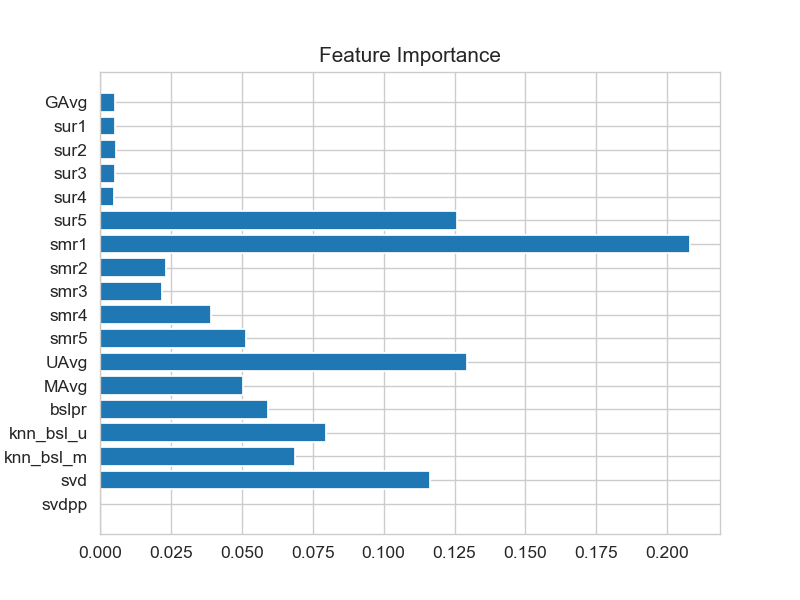

In [123]:
plt.barh(index,model_final)
plt.yticks(index[::-1],reg_train.columns.drop(['user','movie','rating']).values)
plt.title('Feature Importance')
plt.show()

In [124]:
print('RMSE of the model ',models_evaluation_test['first_algo']['rmse'])
print('MAPE of the model ',models_evaluation_test['first_algo']['mape'])

RMSE of the model  1.0834830215885431
MAPE of the model  34.24178377637676


In [125]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=False, subsample=1, verbosity=1)

<h3> 4.4.8 XgBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

In [127]:
x_train = reg_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']

xgb_all_models = xgb.XGBRegressor(silent=False, n_jobs=-1, random_state=15, n_estimators=100)
train_results, test_results,model = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test,param_tuning=True)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   13.8s remaining:   20.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   50.5s finished


[06:45:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [128]:
model_final_all = model.best_estimator_.feature_importances_
index = np.arange(len(model_final_all))

<IPython.core.display.Javascript object>


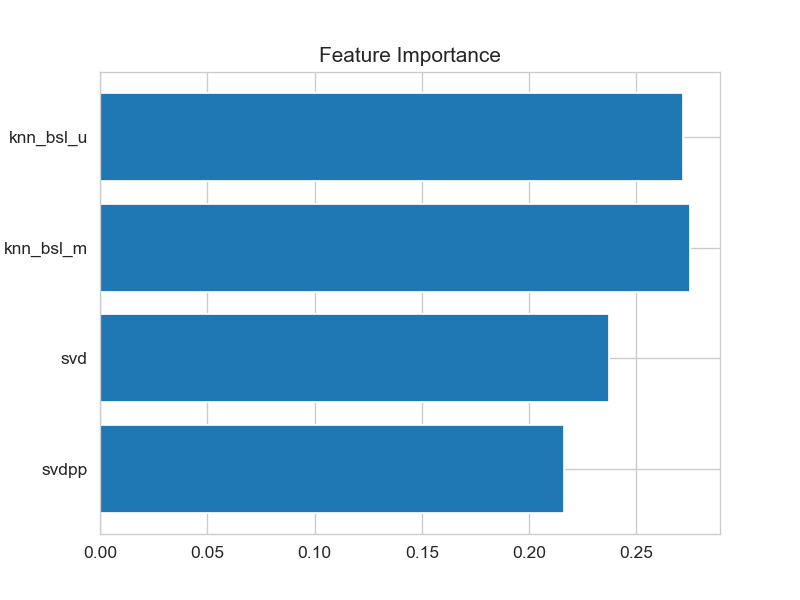

In [129]:
plt.barh(index,model_final_all)
plt.yticks(index[::-1],reg_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']].columns.values)
plt.title('Feature Importance')
plt.show()

In [130]:
print('RMSE of the model ',models_evaluation_test['first_algo']['rmse'])
print('MAPE of the model ',models_evaluation_test['first_algo']['mape'])

RMSE of the model  1.0834830215885431
MAPE of the model  34.24178377637676


In [131]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=15,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=False, subsample=1, verbosity=1)

<h2> 4.5 Comparision between all models </h2>

In [132]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/small_sample_results.csv')
models = pd.read_csv('E:/BOOKS NEW/Cases datasets/4. Netflix Prize/small_sample_results.csv', index_col=0)
models.loc['rmse'].sort_values()

first_algo        1.0834830215885431
xgb_bsl           1.0836178316143001
xgb_knn_bsl       1.0836375522231276
xgb_final          1.083769795695866
knn_bsl_u         1.0868930924141922
svd                1.086920556350756
knn_bsl_m         1.0869572969858712
bsl_algo          1.0870675945776358
svdpp             1.0871683578478946
xgb_all_models    1.0930607323920836
Name: rmse, dtype: object